## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target
#print(X)
#print(y)

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

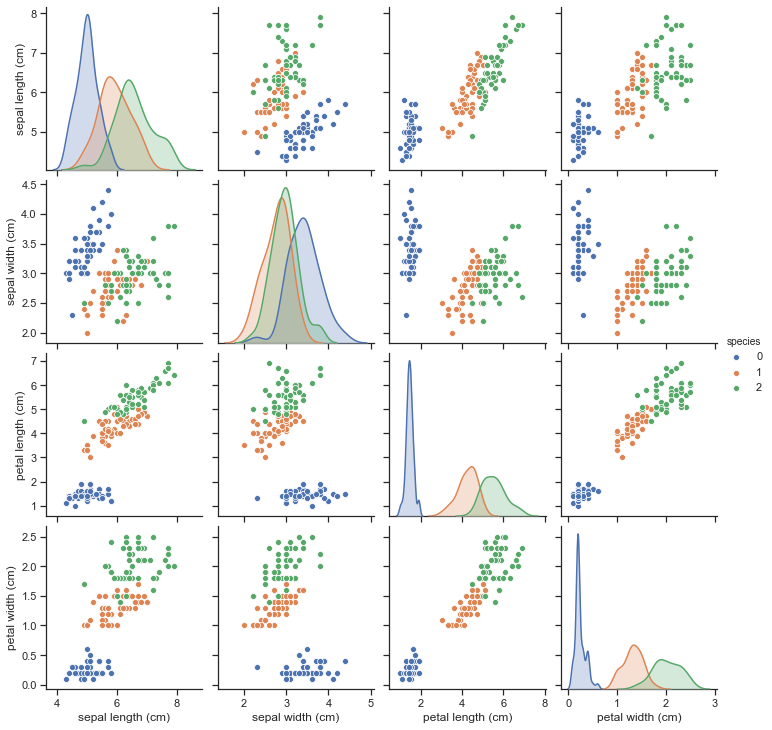

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
    
def myplotGrid(x,y):
    fig = plt.figure(figsize=(16, 16))
    
    #split the data for the different classes
    classData = []
    for i in range(0,3):
        classX = []
        for j in range(0, len(x)):
            #check if it is class 0, 1 or 2 then append to the list
            if(y[j] == i):
                classX.append(x[j])
        
        #add each class array to the class data list
        classData.append(np.array(classX))
        
    
    #loop through the grid
    for i in range(0, 4):
        for j in range(0, 4):
            #create subplot with 4 rows and columns
            ax = fig.add_subplot(4, 4, 1 + (i * 4 + j))
            
            #loop through the 3 classes using enumerate
            for k, data in enumerate(classData):
                #if not diagonal, plot scatter
                if i != j:
                    plt.scatter(data[:, i], data[:, j], label=selected_features[k])
                
                #if not diagonal plot histogram
                else:
                    plt.hist(data[:, i])
                    
                    
            #write labels at the left
            if j == 0:
                ax.set_ylabel(selected_features[i])
                
            if i == 3:
                ax.set_xlabel(selected_features[j])
                
            #add a legend on the bottom right
            if i == 3 and j == 3:
                ax.legend(["class_0", "class_1", "class_2"])

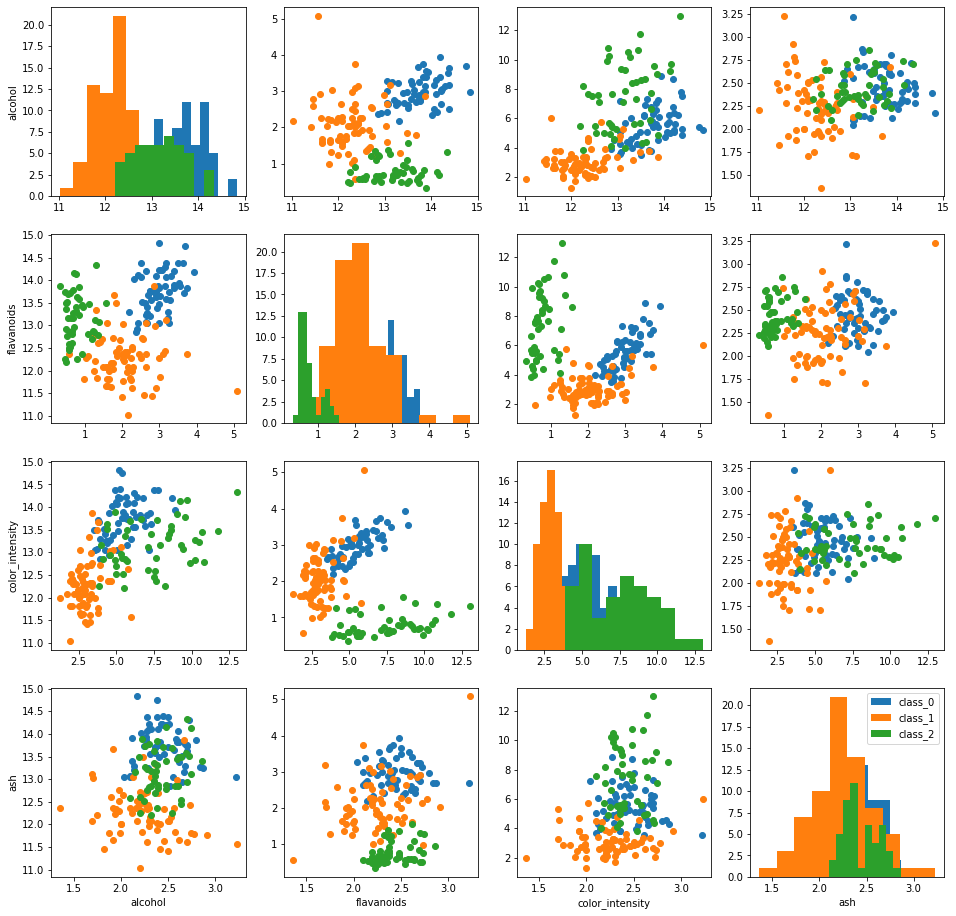

In [3]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

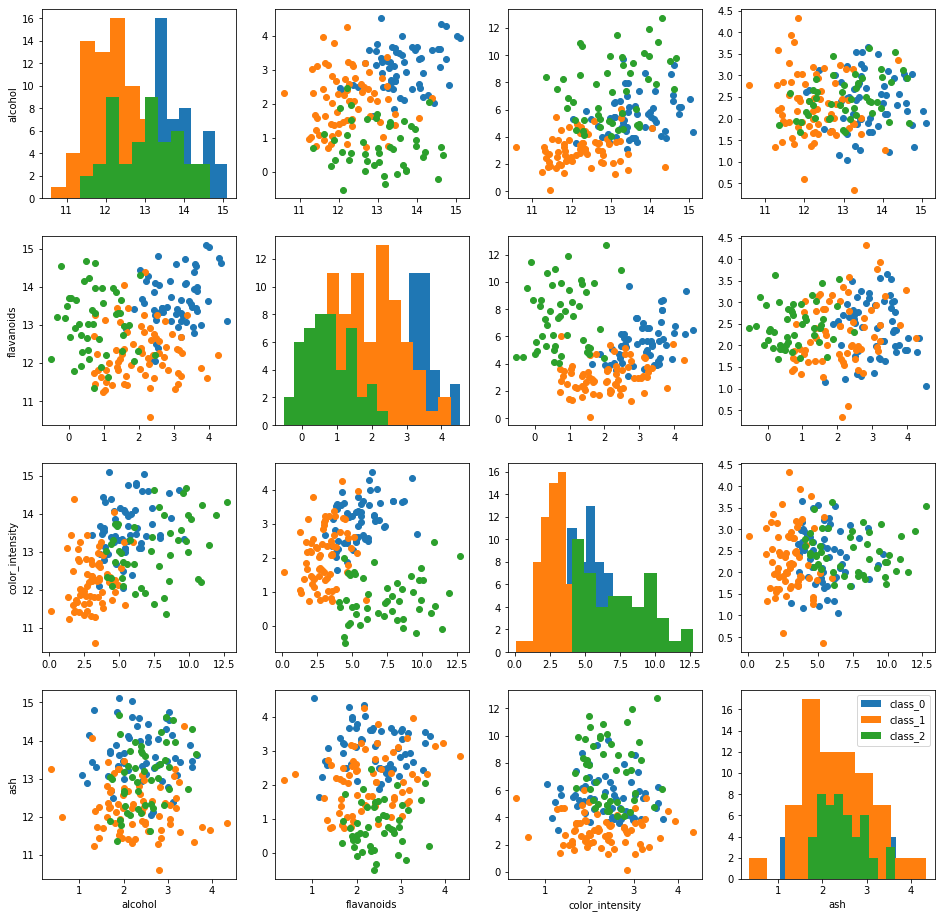

In [4]:
# noise code

#initialise random seed to replicate results over different runs
mySeed = 12345
np.random.seed(mySeed)
XN = X + np.random.normal(0, 0.6, X.shape)
myplotGrid(XN, y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
<p> I feel that ash and colour intensity should be used to build a classifier as even though noise was added to the data, the graphs that was produced did not change significantly compared to some of the other features. This means that even with noise, it was still able to retain the general shape. Therefore if we use this as features to build a classifier, it would be able to classify the product even with noise. </p>


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

<p>In the scatter plots, it can be seen that before the noise was added, there were many plots where data points were very concentrated. However, after the noise was added, the data points that were very concentrated were now quite spread out.</p>
<p>
In the alcohol vs alcohol histogram, it can be seen that there is a general decrease in the frequencies but this is compensated by the spread along the x axis.
</p>


## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code

#Distance functions for options
#Euclidean
def e_Dist(a, b):
    Edist = np.linalg.norm(a-b)
    return Edist

#Manhattan
def m_Dist(a, b):
    if len(a) == len(b):
        Mdist = sum(abs(v1 - v2) for v1, v2 in zip(a, b))
    return Mdist

#split training and test set
def train_test_split(x, y):
    
    #seed to ensure fair testing for scikit
    np.random.seed(12345)
    
    #shuffle the data
    L = list(range(x.shape[0]))
    L = np.random.permutation(L)
    new_x = x[L]
    new_y = y[L]
    
    #split the training data and test data into 80:20
    train_split = int(len(new_x) * 0.8)
    train_x = new_x[0 : train_split]
    train_y = new_y[0 : train_split]
    test_x = new_x[train_split:]
    test_y = new_y[train_split:]
    
    return(train_x, train_y, test_x, test_y)

#knn function
def mykNN(train_x, train_y, test_x, k, dist):
    prediction = []
    
    #loop through the test set
    for x in test_x:
        #based on the distance type chosen, we loop through the training set
        #This is to find the distance between the current test points and all the training points
        dist_list = []
        if dist == "euclidean":
            for j in train_x:
                dist_list.append(e_Dist(x, j))
        elif dist == "manhattan":
            for j in train_x:
                dist_list.append(m_Dist(x, j))
                
        #We then get the k nearest neighbour
        knn_id = np.argsort(dist_list)[:k]
        
        #We loop through the k nearest neighbour id then we get the class
        knn_y = []
        for l in knn_id:
            knn_y.append(train_y[l])
        
        #We count the counts of each class and the highest number of counts would be the predicted value
        counter = np.bincount(knn_y)
        predicted_class = np.argmax(counter)
        
        prediction.append(predicted_class)
        
    return np.array(prediction)

In [6]:
# mykNN code

#split the data
train_x, train_y, test_x, test_y = train_test_split(X, y)

#predict values
y_prediction = mykNN(train_x, train_y, test_x, 4, "euclidean")

print("Actual Values: \n")
print(test_y)
print("\n")
print("Predicted Values: \n")
print(y_prediction)

Actual Values: 

[1 2 2 1 2 1 0 1 2 1 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


Predicted Values: 

[1 2 2 1 1 1 0 1 2 1 0 2 0 0 0 0 2 1 0 1 2 1 1 2 1 1 1 0 2 0 1 1 2 2 1 0]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
# confusion matrix, accuracy, precision, recall, etc. 

def confusion_matrix(predicted_y, test_y, n):
    #create a n dimensional matrix and make it full of 0s
    CM = np.zeros((n,n), dtype=np.int)
    
    #loop through the predicted values
    for i in range(0, len(predicted_y)):
        #go to the location of the array at row of predicted y and column actual y and add 1
        CM[predicted_y[i]][test_y[i]] += 1
    return CM

def Precision(predicted_y, test_y):
    
    #get array of classes
    classes = np.unique(predicted_y)
    
    #get confusion matrix
    con_mat = confusion_matrix(predicted_y, test_y, len(classes))
    
    classprec = []
    
    #loop through to get the true positives and false positives
    for i in range(0, len(classes)):
        tpfp = 0
        for j in classes:
            tpfp += con_mat[i][j]
        classprec.append(con_mat[i][i]/tpfp)
    
    return classprec, con_mat

def Recall(predicted_y, test_y):
    #get array of classes
    classes = np.unique(predicted_y)
    
    #get confusion matrix
    con_mat = confusion_matrix(predicted_y, test_y, len(classes))
    
    classrecall = []
    
    #loop through to get the true positives and false negatives
    for i in range(0, len(classes)):
        tpfn = 0
        for j in classes:
            tpfn += con_mat[j][i]
        classrecall.append(con_mat[i][i]/tpfn)
    
    return classrecall, con_mat

def Accuracy(predicted_y, test_y):
    
    #create counter and increase by 1 each time it is correct
    counter = 0
    accuracy = 0
    for i in range(0, len(predicted_y)):
        if (predicted_y[i] == test_y[i]):
            counter += 1
            
    accuracy = counter / len(predicted_y)
    
    return accuracy


#printing results from my knn
class_precision, prec_confmat = Precision(y_prediction, test_y)
class_recall, recall_confmat = Recall(y_prediction, test_y)
accuracy = Accuracy(y_prediction, test_y)

print("Individual class precision:")
print("%s \n" %class_precision)
print("Precision confusion matrix:" )
print(prec_confmat,"\n")

print("Individual class recall:")
print("%s \n" %class_recall)
print("Recall confusion matrix:")
print(recall_confmat,"\n")

print("Accuracy: %0.3f" %accuracy)

Individual class precision:
[0.9, 0.9375, 1.0] 

Precision confusion matrix:
[[ 9  1  0]
 [ 0 15  1]
 [ 0  0 10]] 

Individual class recall:
[1.0, 0.9375, 0.9090909090909091] 

Recall confusion matrix:
[[ 9  1  0]
 [ 0 15  1]
 [ 0  0 10]] 

Accuracy: 0.944


In [8]:
# test evaluation code

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
knn = KNeighborsClassifier(n_neighbors=4, metric="euclidean")
knn.fit(x_train, y_train)
predict_y = knn.predict(x_test)

class_precision, prec_confmat = Precision(predict_y, y_test)
class_recall, recall_confmat = Recall(predict_y, y_test)
accuracy = Accuracy(predict_y, y_test)

print("Individual class precision:")
print("%s \n" %class_precision)
print("Precision confusion matrix:" )
print(prec_confmat,"\n")

print("Individual class recall:")
print("%s \n" %class_recall)
print("Recall confusion matrix:")
print(recall_confmat,"\n")

print("Accuracy: %0.3f" %accuracy)

Individual class precision:
[1.0, 1.0, 0.9090909090909091] 

Precision confusion matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  1 10]] 

Individual class recall:
[1.0, 0.9285714285714286, 1.0] 

Recall confusion matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  1 10]] 

Accuracy: 0.972



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [9]:
# myNestedCrossVal code

def myNestedCrossVal(x, y, folds, k, dist, mySeed):
    #set the random seed
    np.random.seed(mySeed)
    
    accuracy_list = []
    parameters_list = []
    conf_matrix = []
    
    #shuffle the data
    L = list(range(x.shape[0]))
    L = np.random.permutation(L)
    
    #we will then split the indexes into the number of folds
    split_x = np.array_split(L, folds)
    
    for i in range(0, folds):
        train_list = []
        test_list = []
        val_list = []
        
        #validation set counter
        valCounter = (i + 1) % folds
        
        #loop to take split_x[i] for testing, split_x[i+1] for validation and the rest for training
        for j in range(0, len(split_x)):
            if(i == j):
                test_list = split_x[i]
            elif(j == valCounter):
                val_list = split_x[valCounter]
            else:
                train_list.extend(split_x[j])
                
                
        #save top distance metric, neighbour and accuracy
        topDistance = ""
        noofneighbours = -1
        topAccuracy = -1
        
        #loop through the different distances and no. of neighbours
        for d in dist:
            for nearest in k:
                #using my knn function we get the predicted values and get the accuracy
                y_predict = mykNN(x[train_list], y[train_list], x[val_list], nearest, d)
                accuracy = Accuracy(y_predict, y[val_list])
                
                #check if current accuracy is greater and if it is we get the parameters for the current iteration
                if accuracy > topAccuracy:
                    topDistance = d
                    noofneighbours = nearest
                    topAccuracy = accuracy
                    
        #Once we are done using the validation set we add it to the training set
        train_list.extend(val_list)
        
        #Next we test using the test set and use the top distance and the no. of neighbours
        new_y = mykNN(x[train_list], y[train_list], x[test_list], noofneighbours, topDistance)
        
        #we get the accuracy and add it to the accuracy list and add the current parameters to the parameters list
        new_accuracy = Accuracy(new_y, y[test_list])
        accuracy_list.append(new_accuracy)
        parameters_list.append((topDistance, noofneighbours))
        
        #we get confusion matrix and add it to the confusion matrix list
        uniqueClass = np.unique(new_y)
        con_mat = confusion_matrix(new_y, y[test_list], len(uniqueClass))
        conf_matrix.append(con_mat)
        
    return accuracy_list, parameters_list, conf_matrix

In [10]:
# evaluate clean data code

dist = ["euclidean", "manhattan"]
mySeed = 12345
folds = 5

accuracies, parameters, conf_matrix = myNestedCrossVal(X, y, folds, list(range(1, 11)), dist, mySeed)

#calculate average accuracy and standard deviation
avg_accuracy = np.average(accuracies)
accuracy_std = np.std(accuracies)

In [11]:
# evaluate noisy  data code

noisy_acc, noisy_para, noisy_confmat = myNestedCrossVal(XN, y, folds, list(range(1, 11)), dist, mySeed)

#calculate average accuracy and standard deviation
noisy_avg = np.average(noisy_acc)
noisy_std = np.std(noisy_acc)

In [12]:
# Print the summaries

import pandas as pd
from IPython.display import display

columns = (["clean accuracy", "clean k", "clean distance"])
columns2 = (["noisy accuracy", "noisy k", "noisy distance"])
fold_counter = np.arange(1, folds+1)

#creating the summary for clean data
clean_dist = []
clean_k = []
clean_acc = []
for i in range(0, len(parameters)):
    clean_dist.append(parameters[i][0])
    clean_k.append(parameters[i][1])
    clean_acc.append(round(accuracies[i], 3))
    
clean_data = np.array([clean_acc, clean_k, clean_dist])
df = pd.DataFrame(clean_data.T, fold_counter, columns)

print("Clean data:")
display(df)
print("total: %f ± %f" %(avg_accuracy, accuracy_std))

for i in range(0, folds - 3):
    print("\n")

#creating the summary for noisy data
noisy_dist = []
noisy_k = []
noisy_accuracies = []
for j in range(0, len(noisy_para)):
    noisy_dist.append(noisy_para[j][0])
    noisy_k.append(noisy_para[j][1])
    noisy_accuracies.append(round(noisy_acc[j], 3))
    
noisy_data = np.array([noisy_accuracies, noisy_k, noisy_dist])
df_noisy = pd.DataFrame(noisy_data.T, fold_counter, columns2)

print("Noisy_data:")
display(df_noisy)
print("total: %f ± %f " %(noisy_avg, noisy_std))

Clean data:


,clean accuracy,clean k,clean distance
1,0.972,3,euclidean
2,0.917,1,euclidean
3,0.944,1,euclidean
4,0.886,5,euclidean
5,0.943,1,euclidean


total: 0.932381 ± 0.029214




Noisy_data:


,noisy accuracy,noisy k,noisy distance
1,0.917,1,euclidean
2,0.861,5,euclidean
3,0.861,4,euclidean
4,0.857,10,manhattan
5,0.943,8,euclidean


total: 0.887778 ± 0.035296 


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [13]:
#helper function
def summary_conf_matrix(conf_matrix):
    conf = np.zeros(conf_matrix[0].shape)
    
    for c in conf_matrix:
        conf = np.add(conf, c)
        
    return conf

def conf_precision(matrix):
    classes = np.unique(y)
    class_prec = []
    
    #loop through to get the true positives and false positives
    for i in range(0, len(classes)):
        tpfp = 0
        for j in classes:
            tpfp += matrix[i][j]
        class_prec.append(matrix[i][i]/tpfp)
    return class_prec

def conf_recall(matrix):
    classes = np.unique(y)
    class_recall = []
    #loop through to get the true positives and false negatives
    for i in range(0, len(classes)):
        tpfn = 0
        for j in classes:
            tpfn += matrix[j][i]
        class_recall.append(matrix[i][i]/tpfn)
        
    return class_recall

print('CLEAN')
# clean data summary results

display(df)
print("total: %0.3f ± %0.3f\n" %(avg_accuracy, accuracy_std))

clean_matrix = summary_conf_matrix(conf_matrix)
unclean_precision = conf_precision(clean_matrix)
unclean_recall = conf_recall(clean_matrix)
clean_precision = []
clean_recall = []

for i in range(0, len(unclean_precision)):
    clean_precision.append(round(unclean_precision[i], 3))
    clean_recall.append(round(unclean_recall[i], 3))
    
print("confusion matrix:")
print(clean_matrix, "\n")
print("precision : %s\n" %clean_precision)
print("recall : %s\n" %clean_recall)

for j in range(0, folds-3):
    print("\n")

print('NOISY')
# clean data summary results

display(df_noisy)
print("total: %0.3f ± %0.3f \n" %(noisy_avg, noisy_std))

noisy_matrix = summary_conf_matrix(noisy_confmat)
noisy_precision = conf_precision(noisy_matrix)
noisy_recall = conf_recall(noisy_matrix)
noisy_rounded_precision = []
noisy_rounded_recall = []

for k in range(0, len(noisy_precision)):
    noisy_rounded_precision.append(round(noisy_precision[k], 3))
    noisy_rounded_recall.append(round(noisy_recall[k], 3))

print("confusion matrix:")
print(noisy_matrix, "\n")
print("precision: %s\n" %noisy_rounded_precision)
print("recall: %s\n" %noisy_rounded_recall)

CLEAN


,clean accuracy,clean k,clean distance
1,0.972,3,euclidean
2,0.917,1,euclidean
3,0.944,1,euclidean
4,0.886,5,euclidean
5,0.943,1,euclidean


total: 0.932 ± 0.029

confusion matrix:
[[59.  8.  0.]
 [ 0. 61.  2.]
 [ 0.  2. 46.]] 

precision : [0.881, 0.968, 0.958]

recall : [1.0, 0.859, 0.958]





NOISY


,noisy accuracy,noisy k,noisy distance
1,0.917,1,euclidean
2,0.861,5,euclidean
3,0.861,4,euclidean
4,0.857,10,manhattan
5,0.943,8,euclidean


total: 0.888 ± 0.035 

confusion matrix:
[[53.  8.  3.]
 [ 5. 61.  1.]
 [ 1.  2. 44.]] 

precision: [0.828, 0.91, 0.936]

recall: [0.898, 0.859, 0.917]



## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

<p>
    The values of k varied greatly when noise was added. However, the distance measure mostly stayed the same which used the eculidean distance measure except one that used the manhattan distance measure. I can say that the euclidean distance measure is better regardless of the data used. This is because in the 5th fold, the accuracy achieved is the same although it the number of k is higher.
</p>

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:
<p>
    In my knn implementation, I would sort the neighbours by distance before choosing the first in the list
</p>

In [ ]:
#pseudocode assuming number of neighbours is 2
neighbours = []

#I check if the length of the list is 2 and that there are 2 unique neighbours and choose the first one in the list
if len(neighbours) == 2 and len(np.unique(neighbours)) == 2:
    return neighbours[0]

else:
    return neighbours[0]

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

<p>
    One consideration I would need to take into account is the dataset size. Currently I am going through the test set and comparing the distance with every data point in the training set. This process might take longer if the dataset becomes very huge. One change I might make to the code is to assign different areas in the plot so that if a point is in an area, I would just look for the points in that area and this could decrease the time needed to search through the entire dataset.
</p>